# Assignment 1
## Katon Dorojatun Ramadhan Wibowo (51934701)

Platform: Jupyter Notebook (Python 3)

## Importing all necessary module

In [3]:
%matplotlib inline
import math
from matplotlib import pyplot as plt
import numpy as np
import scipy.fftpack as fft
import IPython.display as ipd

pi = math.pi

# Part 1: Warm-up
Creating signal

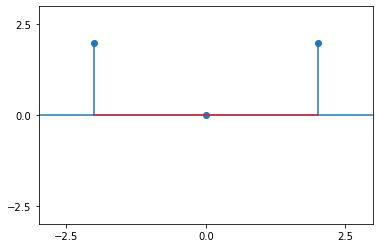

<Figure size 144x144 with 0 Axes>

In [4]:
#signal
signal = [np.array([-2, 0, 2]), np.array([2, 0, 2])]

figsize = (6, 4)
x_lim = [-2, 2]
axes_lim = [-3, 3, -3, 3]

plt.axhline()
plt.axis(axes_lim)
plt.locator_params(nbins=2)
plt.stem(signal[0], signal[1], use_line_collection=True)
plt.figure(figsize=(2,2))
plt.show()

Creating modified version of x(n)

In [5]:
signals = []

for i in range(0, 8):
    signals.append(list(signal))

#1 2x(n)
signals[0][1] = signals[0][1]*2

#2 x(n-2)
signals[1][0] = signals[1][0]-2

#3 3x(-n)
signals[2][0] = -signals[2][0]

#4 -x(-n+1)
signals[3][0] = -(signals[3][0])+1
signals[3][1] = -signals[3][1]

#5 x^2(n)u(n)
signals[4][1] = signals[4][1]^2

#6 x(n+1)u(n-1)
signals[5][0] = signals[5][0]+1

#7 2x(n)cos(pi*n)
signals[6][1] = signals[6][1]*2*(np.cos(pi*signals[6][0]))

#8 x(2n)
signals[7][0] = signals[7][0]*2

Applying DTFT to signals

Creating plot of signals DTFT

# Part 2: Creating a DTMF encoder

## 2.1 Converting a key (0-9, #, \*) into a pair of tones

In [6]:
dtmf_1 = [697, 770, 852, 941]
dtmf_2 = [1209, 1336, 1477]

keys = {
    '1': [dtmf_1[0], dtmf_2[0]],
    '2': [dtmf_1[0], dtmf_2[1]],
    '3': [dtmf_1[0], dtmf_2[2]],
    '4': [dtmf_1[1], dtmf_2[0]],
    '5': [dtmf_1[1], dtmf_2[1]],
    '6': [dtmf_1[1], dtmf_2[2]],
    '7': [dtmf_1[2], dtmf_2[0]],
    '8': [dtmf_1[2], dtmf_2[1]],
    '9': [dtmf_1[2], dtmf_2[2]],
    '*': [dtmf_1[3], dtmf_2[0]],
    '0': [dtmf_1[3], dtmf_2[1]],
    '#': [dtmf_1[3], dtmf_2[2]],
} 


def dsp_key2tones(key, tone_len, fs):
    f = keys[str(key)]
    f_1 = f[0]
    f_2 = f[1]
    w_1 = (2*pi*f_1)/fs
    w_2 = (2*pi*f_2)/fs
    n = np.array(range(0, math.floor((tone_len*fs)-1)))
    tone_1 = np.sin(w_1 * n)
    tone_2 = np.sin(w_2 * n)
    tones = 0.5*(tone_1 + tone_2)
    return tones

## 2.2 Converting a sequence of keys into a sequence of tone-pairs

In [7]:
def dsp_encode_dtmf(keys_input, tone_len, zero_len, fs):
    num_keys = len(keys_input)
    tone_len_n = math.floor(tone_len*fs)
    zero_len_n = math.floor(zero_len*fs)
    key_pause = np.zeros(zero_len_n)
    
    for i in range(0, len(keys_input)):
        if i == 0:
            dtmf_signal = dsp_key2tones(keys_input[i], tone_len, fs)
            dtmf_signal = np.append(dtmf_signal, key_pause)
        else:
            dtmf_signal = np.append(dtmf_signal, dsp_key2tones(keys_input[i], tone_len, fs))
            dtmf_signal = np.append(dtmf_signal, key_pause)
    
    return dtmf_signal

## 2.3 Testing the encoder

In [8]:
tone_len = 0.3
zero_len = 0.1
fs = 22050

#generate the DTMF signal
key_input = '01205551234'
#dtmf_signal = dsp_encode_dtmf(keys, tone_len, zero_len, fs)

#play the DTMF signal
dtmf_signal = dsp_encode_dtmf(key_input, tone_len, zero_len, fs)

ipd.Audio(dtmf_signal, rate=fs)

[23.38177734+0.j          0.15650332-2.79424923j  0.38788548-2.96544711j
 ...  3.62863799+4.45151237j  0.38788548+2.96544711j
  0.15650332+2.79424923j]


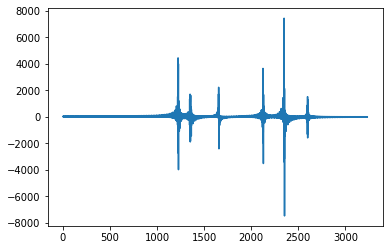

In [79]:
time = np.array(range(0, len(dtmf_signal)))
times = time*(tone_len + zero_len)

signal = fft.fft(dtmf_signal)

print(signal)

plt.plot(times[0:(len(times)//12)], signal[0:(len(signal)//12)])
plt.show()

# Part 3: Creating a DTMF decoder

In [ ]:
#def dsp_tones2key(tones, fs)


## 3.1 Converting a tone-oair into a key

In [ ]:

# tones - the input tone-pair signal
# fs - the audio sampling frequency (8000, 11025, 22050, or 44100 Hz)
# key - an output string containing the single key (0-9, #, or *)

def dsp_tones2key(tones ,fs):
    #1 Estimate the DTFT of the input signal by using the FFT. Make sure you use a long enough FFT for your signal
    
    #2 Look for peaks in the magnitude spectrum; locate the DT frequencies at which these peaks occur (call them w_1 and W_2)
    
    #3 Convert the DT frequencies into CT frequencies (f_1 and f_2) based on the sampling rate (fs)
    
    #4 Write a function called dsp_find_nearest_freq() that takes as input your located frequency (f_1 or f_2)
    # and yields as output the closest DTMF frequency. See the prototype below. Then, use this function like so:
    
    f_1 = dsp_find_nearest_dtmf_freq(f_1)
    f_2 = dsp_find_nearest_dtmf_freq(f_2)
    
    # get key (string) from two frequencies -- see dsp_freq2key() below
    if f_1 < f_2:
        key = dsp_freqs2key(f_1, f_2)
    else:
        key = dsp_freqs2key(f_2, f_1)
    return key

# Find the closest value to f in dtmf_freqs
def dsp_find_nearest_dtmf_freq(f):
    dtmf_freqs = [697, 770, 852, 941, 1209, 1336, 1477]
    dtmf_f = 1
    return dtmf_f

def dsp_freqs2key(f_lo, f_hi):
    # DTMF frequencies
    dtmf_lo = [697, 770, 852, 941]
    dtmf_hi = [1209, 1336, 1477]
        
    # look up the key
    if f_lo == dtmf_lo[0]:
        if f_hi == dtmf_hi[0]:
            key = '1'
        elif f_hi == dtmf_hi[1]:
            key = '2'
        elif f_hi == dtmf_hi[2]:
            key = '3'
    elif f_lo == dtmf_lo[1]:
        if f_hi == dtmf_hi[0]:
            key = '4'
        elif f_hi == dtmf_hi[1]:
            key = '5'
        elif f_hi == dtmf_hi[2]:
            key = '6'
    elif f_lo == dtmf_lo[2]:
        if f_hi == dtmf_hi[0]:
            key = '7'
        elif f_hi == dtmf_hi[1]:
            key = '8'
        elif f_hi == dtmf_hi[2]:
            key = '9'
    elif f_lo == dtmf_lo[2]:
        if f_hi == dtmf_hi[0]:
            key = '*'
        elif f_hi == dtmf_hi[1]:
            key = '0'
        elif f_hi == dtmf_hi[2]:
            key = '#'         
    return key

## 3.2 Converting a full DTMF signal into a sequence of keys

In [ ]:
def dsp_decode_dtmf(dtmf_signal, num_keys, fs):
    dtmf_len = len(dtmf_signal)
    key_len = math.floor(dtmf_len/num_keys)
    
    keys = ''
    
    for i in range(0, num_keys):
        dtmf_block = dtmf_signal[i:key_len]
        block_fft = fft(dtmf_block)
        key = 
        
        keys = keys.append(key)
    
    return keys

## 3.3 Testing your decoder

In [ ]:
tone_len = 0.3
zero_len = 0.1
fs = 22050

# generate the DTMF signal
keys = '01205551234#*'
#dtmf_signal = dsp_encode_dtmf(keys, tone_len, zero_len, fs)

# play the DTMF signal

# decode the DTMF signal
num_keys = len(keys)
#keys_dec = dsp_decode_dtmf(dtmf_signal, num_keys, fs)
print('keys_dec = ')
#print(keys_dec)

In [ ]:
dtmf_len = len(dtmf_signal)
key_len = math.floor(dtmf_len/num_keys)
    
#for i in range(0, num_keys):
dtmf_block = dtmf_signal
block_fft = np.fft.fft(dtmf_block)
freq_fft = np.fft.fftfreq(dtmf_block.shape[-1])

max_intensity = max(block_fft)
max_index = np.argmax(block_fft)

timestep=0.1
n = dtmf_signal.shape[-1]
freq = np.fft.fftfreq(n, d=timestep)

print(block_fft)